In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('SONY.csv')
# Ensure that the 'Date' column is in the correct datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns={'Price': 'y', 'Date': 'ds'}, inplace=True)

In [3]:
# Split the data into training and testing sets (70% train, 30% test)
split_ratio = 0.7
split_index = int(len(df) * split_ratio)
train_df = df[:split_index]
test_df = df[split_index:]


In [4]:
# First Prophet model to predict the test data
prophet1 = Prophet(daily_seasonality=True)
prophet1.fit(train_df)


09:22:16 - cmdstanpy - INFO - Chain [1] start processing
09:22:17 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
# Create a DataFrame for predictions
future1 = test_df.drop(columns='y')
forecast1 = prophet1.predict(future1)

In [6]:
# Second Prophet model to predict the next 30 days after the test data
prophet2 = Prophet(daily_seasonality=True)
prophet2.fit(train_df)


09:22:17 - cmdstanpy - INFO - Chain [1] start processing
09:22:17 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# Extend the future DataFrame to include the next 30 days
last_date = df['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=31)
future2 = pd.DataFrame({'ds': future_dates})
forecast2 = prophet2.predict(future2)

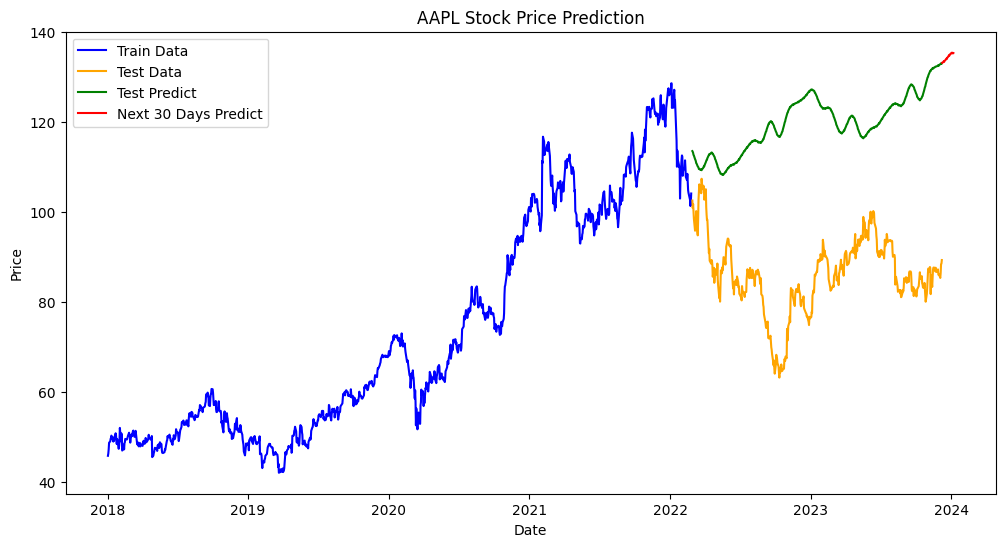

In [8]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot train data
plt.plot(train_df['ds'], train_df['y'], label='Train Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot predicted test data
plt.plot(forecast1['ds'], forecast1['yhat'], label='Test Predict', color='green')

# Plot predicted next 30 days and connect it to the test predict
last_test_date = test_df['ds'].iloc[-1]
next_30_days = forecast2[forecast2['ds'] > last_test_date]
plt.plot(next_30_days['ds'], next_30_days['yhat'], label='Next 30 Days Predict', color='red')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price Prediction')

plt.show()

In [9]:
# Print out the values of the next 30 days predictions
next_30_days[['ds', 'yhat']]

,ds,yhat
1,2023-12-09,133.132201
2,2023-12-10,133.196188
3,2023-12-11,133.252911
4,2023-12-12,133.396776
5,2023-12-13,133.459202
6,2023-12-14,133.352683
7,2023-12-15,133.559355
8,2023-12-16,133.643221
9,2023-12-17,133.731671
10,2023-12-18,133.815081


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Calculate RMSE, MAPE, and MAE for the test set predictions
y_true = test_df['y'].values
y_pred = forecast1[forecast1['ds'].isin(test_df['ds'])]['yhat'].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Testing RMSE:', rmse)
print('Testing MAPE:', mape)
print('Testing MAE:', mae)

Testing RMSE: 35.708481769372256
Testing MAPE: 40.81714622511182
Testing MAE: 33.764031504210536


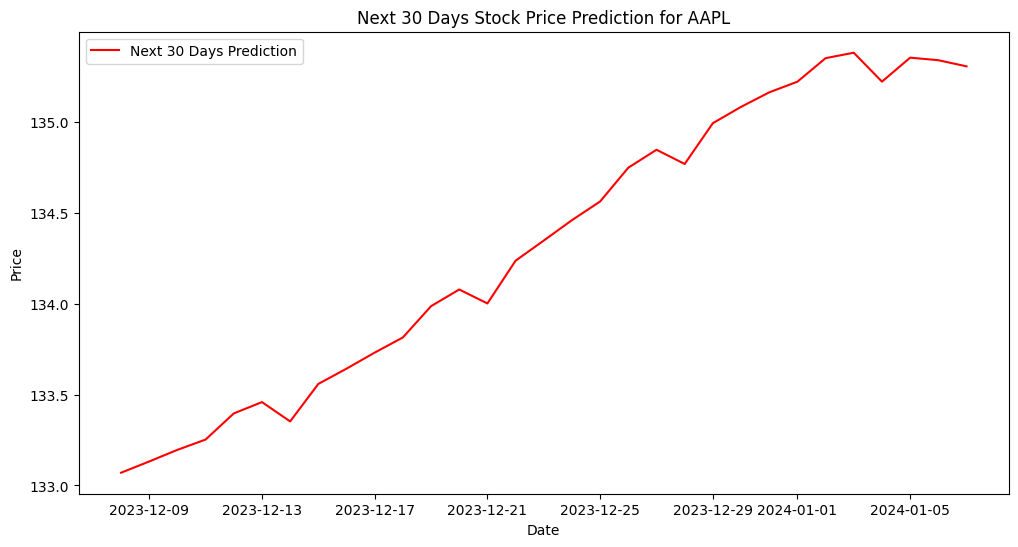

In [11]:
# Plotting the next 30 days predictions
plt.figure(figsize=(12, 6))
plt.plot(forecast2['ds'], forecast2['yhat'], label='Next 30 Days Prediction', color='red')
plt.title('Next 30 Days Stock Price Prediction for AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()